In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_data)
clinical = pd.read_csv(clinical_data)

# Combine the data into a single dataset
MC = mouse.merge(clinical,how = "outer")

# Display the data table for preview
MC.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
D_T = MC.groupby(['Drug', 'Timepoint'])
tumor_mean1 = D_T['Tumor Volume (mm3)'].mean()
tumor_mean1
# Convert to DataFrame
tumor_mean11 = tumor_mean1.to_frame()
tumor_mean11 = tumor_mean11.reset_index()
# Preview DataFrame
tumor_mean11.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se1 = D_T['Tumor Volume (mm3)'].sem()
tumor_se1
# Convert to DataFrame
tumor_se11 = tumor_se1.to_frame()
tumor_se11 = tumor_se11.reset_index()
# Preview DataFrame
tumor_se11.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = tumor_mean11.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
tumor_se_pivot= tumor_se11.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


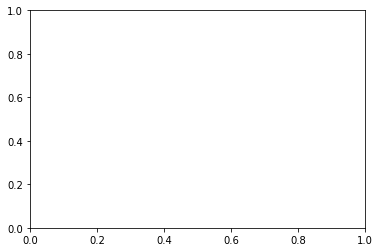

In [6]:
# Generate the Plot (with Error Bars)
x_axis = [index1 for index1 in tumor_se_pivot.index]
fig, ax = plt.subplots()
for x in tumor_se_pivot.columns:
    ax.errorbar(x_axis, tumor_mean_pivot[x], tumor_se_pivot[x],fmt="o", label = str(x))
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volumes')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = "best")
    # Save the Figure
    plt.savefig(f'Export Images/{x}_TumorVol')
    plt.cla()
    #the preivew is blank because I clear the subplot after each export so they show individual drugs,
    #but the next box is a preview of them all plotted together

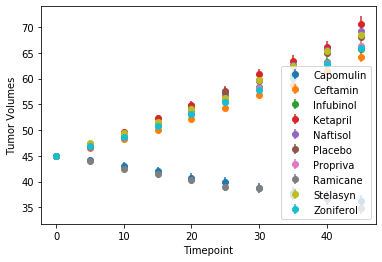

In [7]:
# Show the Figure
#This one shows all of them, but the exports are all individual
x_axis = [index1 for index1 in tumor_se_pivot.index]
fig, ax = plt.subplots()
for x in tumor_se_pivot.columns:
    ax.errorbar(x_axis, tumor_mean_pivot[x], tumor_se_pivot[x],fmt="o", label = str(x))
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volumes')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = "best")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite_mean1 = D_T['Metastatic Sites'].mean()
metsite_mean1
# Convert to DataFrame
metsite_mean11 = metsite_mean1.to_frame()
metsite_mean11 = metsite_mean11.reset_index()
# Preview DataFrame
metsite_mean11.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_se1 = D_T['Metastatic Sites'].sem()
metsite_se1
# Convert to DataFrame
metsite_se11 = metsite_se1.to_frame()
metsite_se11 = metsite_se11.reset_index()
# Preview DataFrame
metsite_se11.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
metsite_mean_pivot = metsite_mean11.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
metsite_se_pivot= metsite_se11.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
metsite_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


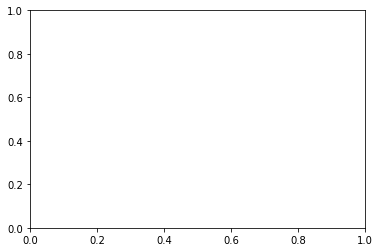

In [11]:
# Generate the Plot (with Error Bars)
x_axis = [index1 for index1 in metsite_mean_pivot.index]
fig, ax = plt.subplots()
for x in metsite_mean_pivot.columns:
    ax.errorbar(x_axis, metsite_mean_pivot[x], metsite_se_pivot[x],fmt="o", label = str(x))
    plt.xlabel('Timepoint')
    plt.ylabel('Metastatic Sites')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = "best")
    # Save the Figure
    plt.savefig(f'Export Images/{x}_MetSite')
    plt.cla()
    #the preivew is blank because I clear the subplot after each export so they show individual drugs,
    #but the next box is a preview of them all plotted together

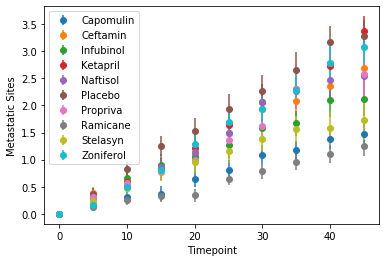

In [12]:
# Show the Figure
#This one shows all of them, but the exports are all individual
x_axis = [index1 for index1 in metsite_mean_pivot.index]
fig, ax = plt.subplots()
for x in metsite_mean_pivot.columns:
    ax.errorbar(x_axis, metsite_mean_pivot[x], metsite_se_pivot[x],fmt="o", label = str(x))
    plt.xlabel('Timepoint')
    plt.ylabel('Metastatic Sites')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = "best")
    plt.show

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = D_T['Mouse ID'].nunique()
# Convert to DataFrame
mouse_count1 = mouse_count.to_frame()
mouse_count1 = mouse_count1.reset_index()
mouse_count1.rename(columns={'Mouse ID':'Mouse Count'}, inplace=True)
# Preview DataFrame
mouse_count1.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count1.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


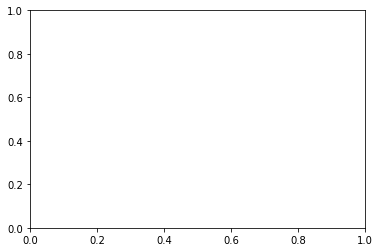

In [15]:
# Generate the Plot (Accounting for percentages)
x_axis = [index1 for index1 in mouse_count_pivot.index]
fig, ax = plt.subplots()
for x in mouse_count_pivot.columns:
    ax.errorbar(x_axis, round((mouse_count_pivot[x]/25)*100,2),marker="o", label = str(x))
    plt.xlabel('Timepoint')
    plt.ylabel('Survival Rate')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = "best")
    # Save the Figure
    plt.savefig(f'Export Images/{x}_Survival')
    plt.cla()
    #the preivew is blank because I clear the subplot after each export so they show individual drugs,
    #but the next box is a preview of them all plotted together

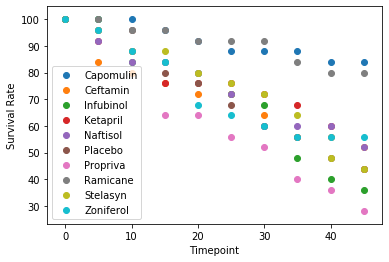

In [16]:
# Show the Figure
#This one shows all of them, but the exports are all individual
x_axis = [index1 for index1 in mouse_count_pivot.index]
fig, ax = plt.subplots()
for x in mouse_count_pivot.columns:
    ax.scatter(x_axis, round((mouse_count_pivot[x]/25)*100,2),marker="o", label = str(x))
    plt.xlabel('Timepoint')
    plt.ylabel('Survival Rate')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = "best")
    plt.show

## Summary Bar Graph

In [40]:
# Calculate the percent changes for each drug
#(New Value - Initial Value)/(Initial Value) * 100
final_vol = pd.DataFrame(tumor_mean11.loc[tumor_mean11['Timepoint'] == 45]).set_index('Drug')
final_vol['Percent Change'] = (final_vol['Tumor Volume (mm3)']-45)/45*100
final_vol['Percent Change']

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Percent Change, dtype: float64

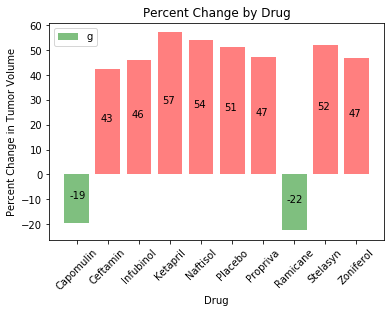

In [85]:
# Store all Relevant Percent Changes into a Tuple
final_vols = [x for x in final_vol['Percent Change']]
half_vols = [x/2 for x in final_vols]
# Splice the data between passing and failing drugs
bins1 = [-100,0,101]
bins2 = ['Pass','Fail']
final_vol['Pass/Fail'] = pd.cut(final_vols, bins1, labels = bins2)
colors = []
for x in final_vol['Pass/Fail']:
    if x == "Pass":
        colors.append('g')
    else:
        colors.append('r')
# Orient widths. Add labels, tick marks, etc.
# Use functions to label the percentages of changes
# Show the Figure
final_vols2 = [round(x) for x in final_vols]
x_axis = np.arange(len(final_vol.index))
tick_locations = [value for value in x_axis]
tick_locations1 = [value-0.25 for value in tick_locations]
plt.bar(final_vol.index, final_vol['Percent Change'], color=colors, alpha=0.5, align="center")
plt.xticks(tick_locations, final_vol.index, rotation="45")
for a, b, c in zip(tick_locations1,half_vols,final_vols2):
    plt.text(a,b,c)
plt.xlabel('Drug')
plt.ylabel('Percent Change in Tumor Volume')
plt.title('Percent Change by Drug')
# Save the Figure

![Metastatic Spread During Treatment](../Images/change.png)